In [73]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# Simulation parameters
n_days = 252  # days in simulation
n_paths = 1000  # number of simulations
initial_investment = 10000
np.random.seed(42)

In [55]:
# S&P 500 index
sp500 = yf.download('^GSPC', period='5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [56]:
sp500cnt = sp500.iloc[:,0]
sp500cnt

,Close
,^GSPC
Date,
2020-04-06,2663.679932
2020-04-07,2659.409912
2020-04-08,2749.979980
2020-04-09,2789.820068
2020-04-13,2761.629883
...,...
2025-03-31,5611.850098
2025-04-01,5633.069824


In [57]:
returns = sp500['Close'].pct_change().dropna()
returnsARR = np.array(returns)
returnsARR

array([[-0.00160305],
       [ 0.03405645],
       [ 0.01448741],
       ...,
       [ 0.00672819],
       [-0.04839563],
       [-0.05974961]])

In [58]:
sp500ARR = np.array(sp500.iloc[:,0])
last_price = sp500ARR[-1]
last_price

np.float64(5074.080078125)

In [59]:
mu = returnsARR.mean()
std = returnsARR.std()
print("Mean = ",mu," Std = ",std)

Mean =  0.0005741824973973812  Std =  0.011023274344010549


In [69]:
simulations = np.zeros((n_paths, n_days))
investment_values = np.zeros(n_paths)
for i in range(n_paths):
    rand_returns = np.random.normal(mu, std, n_days)
    simulations[i] = last_price * np.exp(np.cumsum(rand_returns))
    investment_values[i] = initial_investment * (simulations[i][-1] / last_price)

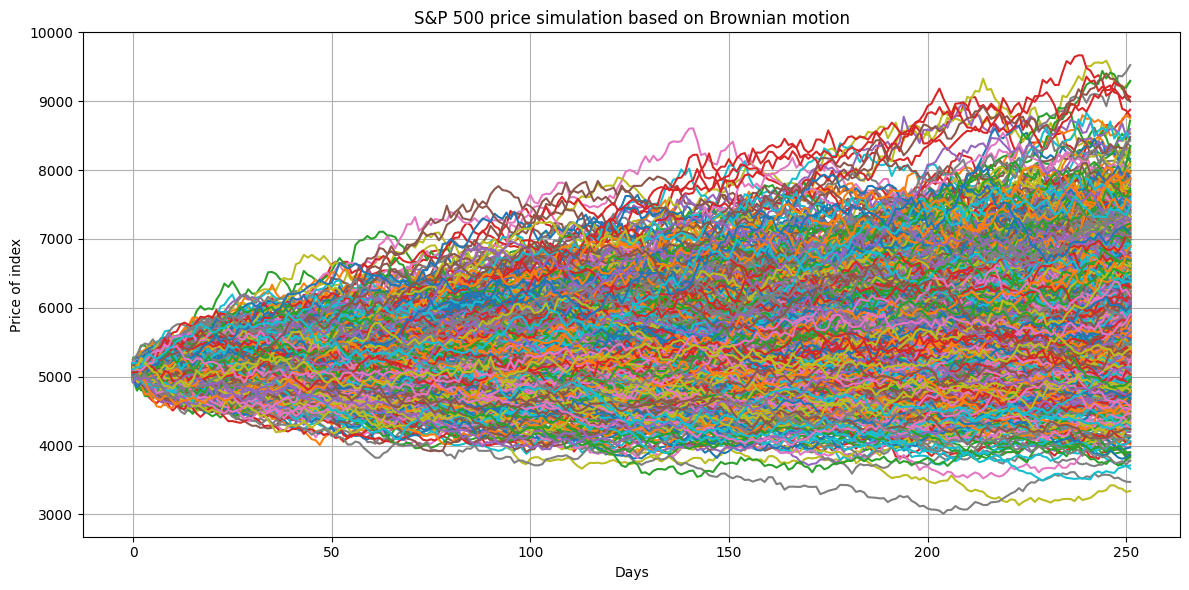

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(simulations.T)
plt.title('S&P 500 price simulation based on Brownian motion')
plt.xlabel('Days')
plt.ylabel('Price of index')
plt.grid(True)
plt.tight_layout()
plt.show()

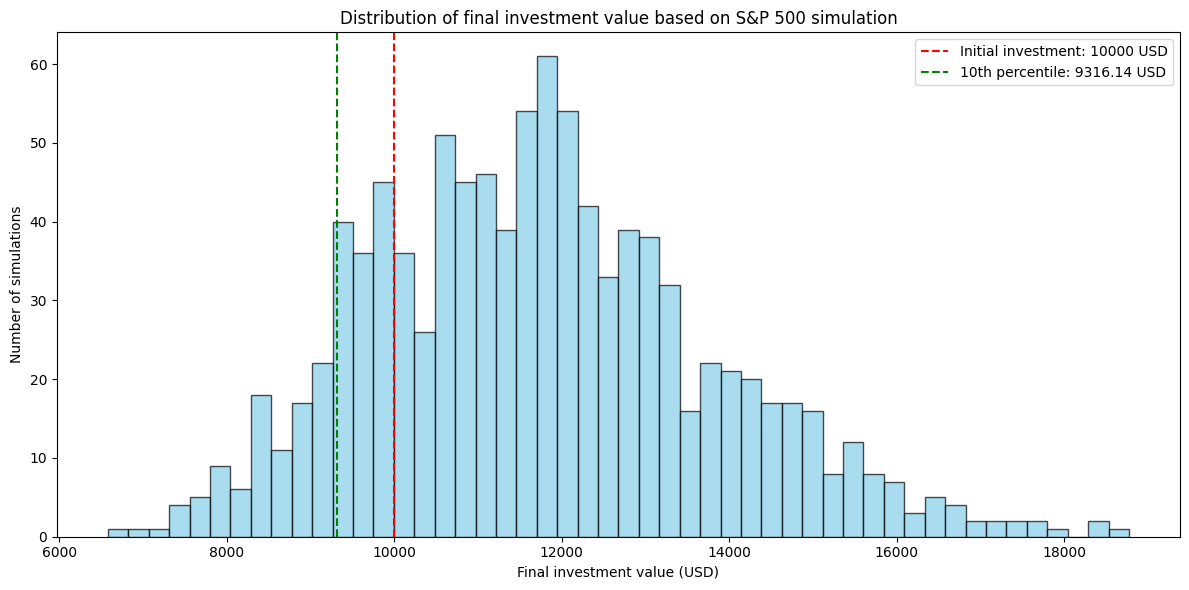

In [79]:
plt.figure(figsize=(12, 6))
plt.hist(investment_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(initial_investment, color='red', linestyle='--', label=f'Initial investment: {initial_investment} USD')
plt.axvline(9316.14, color='green', linestyle='--', label=f'10th percentile: {9316.14} USD')
plt.title('Distribution of final investment value based on S&P 500 simulation')
plt.xlabel('Final investment value (USD)')
plt.ylabel('Number of simulations')
plt.tight_layout()
plt.legend()
plt.show()

In [76]:
np.percentile(investment_values, 10)

np.float64(9316.136741934655)